## ■ 3장.신경망

### ※ Review

### 1장 : 신경망을 구현하기 위해 알아야하는 파이썬 문법
    - numpy 사용법
    - matplotlib 패키지로 그래프를 그리는 방법

### 2장 : 퍼셉트론  
" 신경망안에 뉴런 1개를 컴퓨터로 구현 "

* 퍼셉트론의 종류 2가지
    1. 단층 퍼셉트론
    2. 다층 퍼셉트론
    
단층 퍼셉트론의 한계를 다층 퍼셉트론으로 해결했는데 그 한계가 무엇이었는가?

" xor 게이트를 단층 퍼셉트론으로는 구현이 불가능해서 다층 퍼셉트론으로 해결을 했다."

__최적의 W(가중치)를 알아내는 것이 목표이다!!!__

ex) 삼성 디스플레이 모니터에 흠집이 있는지 검사하는 신경망  --> 최적의 W 찾기

ex) 알파고 : 강화학습 + 신경망 -> 최적의 W

ex) mnist(필기체 데이터) : 신경망을 통하여 필기체를 구분 --> 최적의W

ex) 의사들이 쓴 차트 필기체(아산병원) 인식 -> 신경망 -> 최적의 W

## ■ 1. 퍼셉트론에서 신경망으로 

퍼셉트론 -> 뉴런 1개

신경망 -> 뉴런이 여러개

### 뉴련의 역할 ?   

뉴런의 안의 활성화 함수가 입력값의 총합을 받아서 확률을 출력 합니다. 

입력값으로 개 이미지를 받았으면 개일 확률이 어떻게 되는지 확률을 출력해준다.

## ■ 2. 활성화 함수

활성화 함수란 ?

__신경망내에서 신호를 보낼지 말지를 결정하는 함수(계단함수)__

__신경망내에서 신호를 약하게 보낼지 강하게 보낼지를 결정하는 함수(시그모이드 함수, 렐루 함수)__

1. 계단 함수 : 숫자 0과 1을 리턴하는 함수 (그림 3-6 // x축 입력신호, y축 출력신호)
2. 시그모이드 함수 : 숫자 0~1 사이의 실수를 리턴하는 함수 (그림 3-8)
3. 렐루 함수 : 입력되는 값이 0보다 크면 그 값을 그대로 출력하고 0 이하이면 0을 리턴하는 함수 (그림3-9)

## ■ 시그모이드 함수의 유래

왜 우리가 지수함수 미분과 로그함수 미분을 배워야 하는가?

시그모이드 함수의 수학식 때문에?


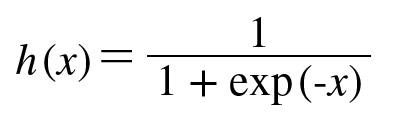

### 1. 오즈비율 함수

    - 실패할 확률대비 성공할 확률을 구하는 함수. (P/1-P)
    

### 2. 로짓함수  

    - 오즈비율 함수에 로그를 사용한 함수 (log(P/1-P))
    - 우리가 필요한 건 입력신호에 대한 확률 값이기 때문에 log(P/1-P)값을 확률 값으로 바꾸어줄 필요가 있다.
    
### 3. 시그모이드 함수   

    - 로짓함수를 신경망에서 P(확률)값을 계산하기 편하도록 지수형태로 바꾼 함수
    - 위의 식 참고
    
    
(오즈비율함수 -> 로짓함수 - > 시그모이드 함수)

## 문제27. 계단함수를 파이썬으로 구현하시오!

" 숫자 0과 1을 리턴하는 함수 "

In [10]:
# numpy쓰고 만듬

import numpy as np
def step_function(x_data):
    y = x_data > 0  
    print(y) # [False False True]
    return y.astype(np.int) # astype 은 넘파이 배열의 자료형으로 변환 할 때 사용하는 메소드이다.
                            # [False False True] --> [0 0 1]
x_data = np.array([-1,0,1])
print(step_function(x_data))

[False False  True]
[0 0 1]


In [6]:
# numpy안쓰고 만든형태(비추)

def step_function(x):
    if x <= 0:
        return 0
    else:
        return 1

print(step_function(-0.2))

0


## 문제28. (점심시간 문제) 위의 step_function와 matplotlib 패키지를 이용해서  
## 아래와 같이 계단함수를 시각화 하시오~  

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


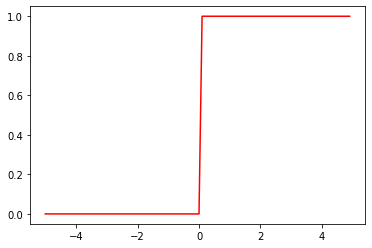

In [2]:
# numpy쓰고 만듬
import numpy as np
import matplotlib.pyplot as plt

def step_function(x_data):
    y = x_data > 0  
    print(y) # [False False True]
    return y.astype(np.int) # astype 은 넘파이 배열의 자료형으로 변환 할 때 사용하는 메소드이다.
                            # [False False True] --> [0 0 1]
    

x = np.arange(-5,5,0.1) # 시작점 -2부터 끝점 2까지 50등분해서 나타냄.
y = step_function(x)


plt.plot(x,y, color = "red") # color는 색깔 / x와 y는 1대1 대응
plt.grid

plt.show()

## ※ 시그모이드 함수

In [ ]:
#numpy로 시그모이드를 표현

h(x)  = 1 / 1+np.exp(-x)

exp(-x)는 e^-x를 뜻하며, e는 자연상수로 2.7182...의 값을 갖는 실수 입니다. 복잡해보이지만 단순한 '함수'일 뿐입니다.

h(1.0) = 0.731..., h(2.0) = 0.880 ... 실수값을 리턴해준다.  
신경망에서 활성화함수로 시그모이드 함수를 이용하여 신호를 변환하고, 그 변환된 신호를 다음 뉴런으로 전달합니다.

## 문제29. 시그모이드 함수를 파이썬으로 구현하시오!

In [18]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
print(sigmoid(x))

[0.26894142 0.73105858 0.88079708]


## 문제30. 시그모이드 함수의 그래프를 시각화 하시오!

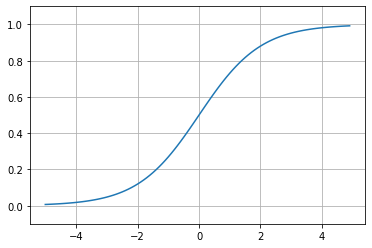

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5,5,0.1)

y = sigmoid(x)

plt.figure()
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.grid()
plt.show()

## ※ 시그모이드(sigmoid)란 'S자모양'이라는 뜻입니다.

## ■ Relu 함수 (Rectified Linear unit)

rectified = 정류된

정류는 전기회로 쪽 용어로, 예를 들어 반파정류회로는 +/- 가 반복되는 교류에서 (-)흐름을 차단하는 회로입니다.   
Relu 함수 그래프(그림 3-9) 처럼 x가 0 이하 일때 차단하여 아무런 값도 출력하지 않는(0을 출력) 것입니다.

__Relu 함수__는 입력이 0을 넘으면 그 입력을 그대로 출력하고 0이하면 0을 출력하는 함수

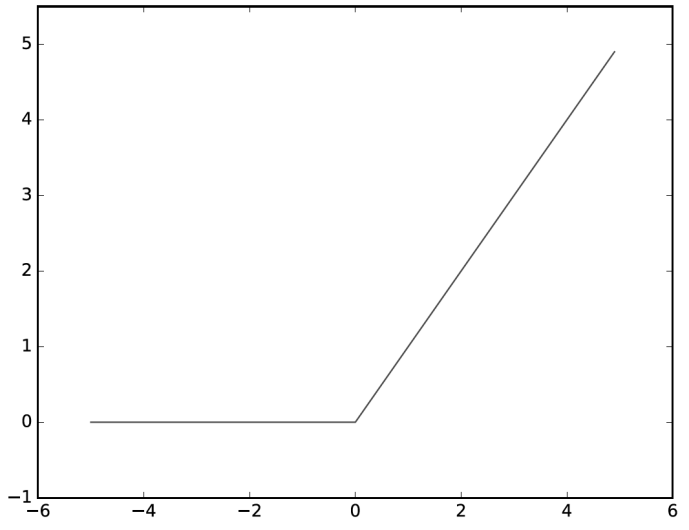

## 예제1. Relu함수를 만드시오!

In [24]:
import numpy as np

def relu(x):
    return np.maximum(0,x) # 0과 x값중에 큰 값을 출력해라!
print(relu(-2)) # 0
print(relu(0.3)) # 0.3

0
0.3


## 문제31. Relu 함수를 시각화 하시오.

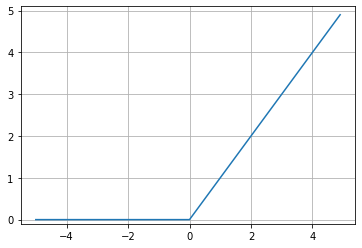

In [3]:
import numpy as np

def relu(x):
    return np.maximum(0,x) # 0과 x값중에 큰 값을 출력해라!

x = np.arange(-5,5,0.1)
y = relu(x)

plt.plot(x,y)
plt.ylim(-0.1, 5.1)
plt.grid()
plt.show()

## ■ 3. 다차원 배열의 계산

__다차원 배열__도 그 기본은 __'숫자의 집합'__입니다. 숫자가 한 줄로 늘어선것이나  
정사각형으로 늘어 놓은것, 3차원으로 불어나온것이나 N차원으로 나열하는 것을 통틀어 __다차원 배열이라고 합니다.__

In [6]:
# 1차원 배열 만드는 방법

import numpy as np

a = np.array([1,2,3,4])

print(a)
print(np.ndim(a)) # 차원확인하는 명령어
print(a.shape) # (4, )
print(a.shape[0]) # 4

[1 2 3 4]
1
(4,)
4


## 문제32. 아래의 2차원 배열을 생성하시오

In [37]:
import numpy as np

b = np.array([[1,2],[3,4],[5,6]])

print(b)
print(np.ndim(b)) # 2차원 배열
print(b.shape) # (3,2)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


## ■ 행렬의 내적 (행렬 곱) (그림 3-11)

In [3]:
# array를 통해서 내적 구현

import numpy as np

a = np.array([[1,2],[3,4]])
b = np.array([[5,6],[7,8]])

result1 = np.dot(a,b) # a@b 도 가능하다!

print(result1)

[[19 22]
 [43 50]]


### ※ np.matrix로 구현하면? (참고)

In [52]:
import numpy as np

a = np.matrix([[1,2],[3,4]])
b = np.matrix([[5,6],[7,8]])

print(a*b) # matrix는 곱하기(*)로 표현하면 된다.

[[19 22]
 [43 50]]


## ※ array와 matrix의 차이?

array는 다차원을 나타낼 수 있는데 matrix는 2차원 밖에 안된다.

## ■ 3층 신경망 구현하기 

### 그림 3-15 (꼭 봐두기)

In [53]:
# 0층에서 1층으로 가는 과정
import numpy as np

x = np.array([1,2])
w1 = np.array([[1,3,5],[2,4,6]])
k = np.dot(x,w1)

print(k)

[ 5 11 17]


## 문제33. 위의 입력값의 총합이 sigmoid 함수를 통과하면 어떤 결과가 나오는지  
## k_prime을 출력하시오!

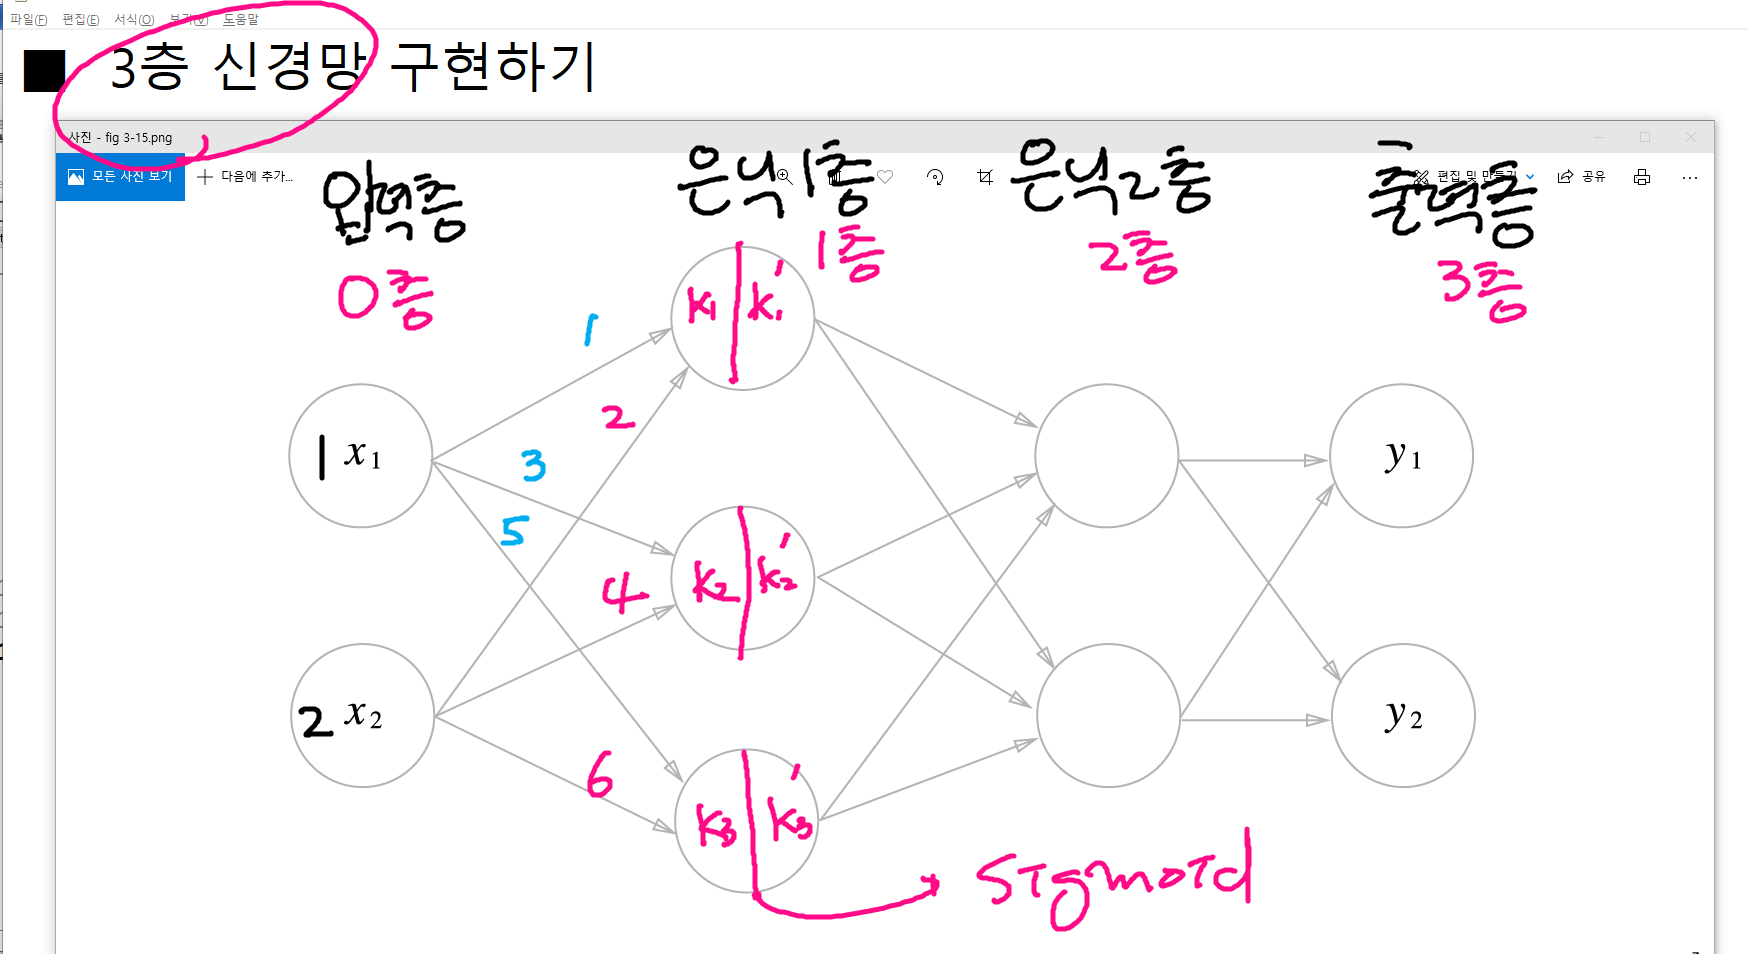

In [55]:
# 입력층(0층)  -> 은닉1층(1층)
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

# 입력층 (0층)
x = np.array([1,2])

# 은닉1층 (1층)
w1 = np.array([[1,3,5],[2,4,6]])
k = np.dot(x,w1) # 가중치들의 곱의 합을 내적으로 표현함. (중요)

k_prime = sigmoid(k) # 시그모이드 적용
print(k_prime)
print(type(k_prime))

[0.99330715 0.9999833  0.99999996]
<class 'numpy.ndarray'>


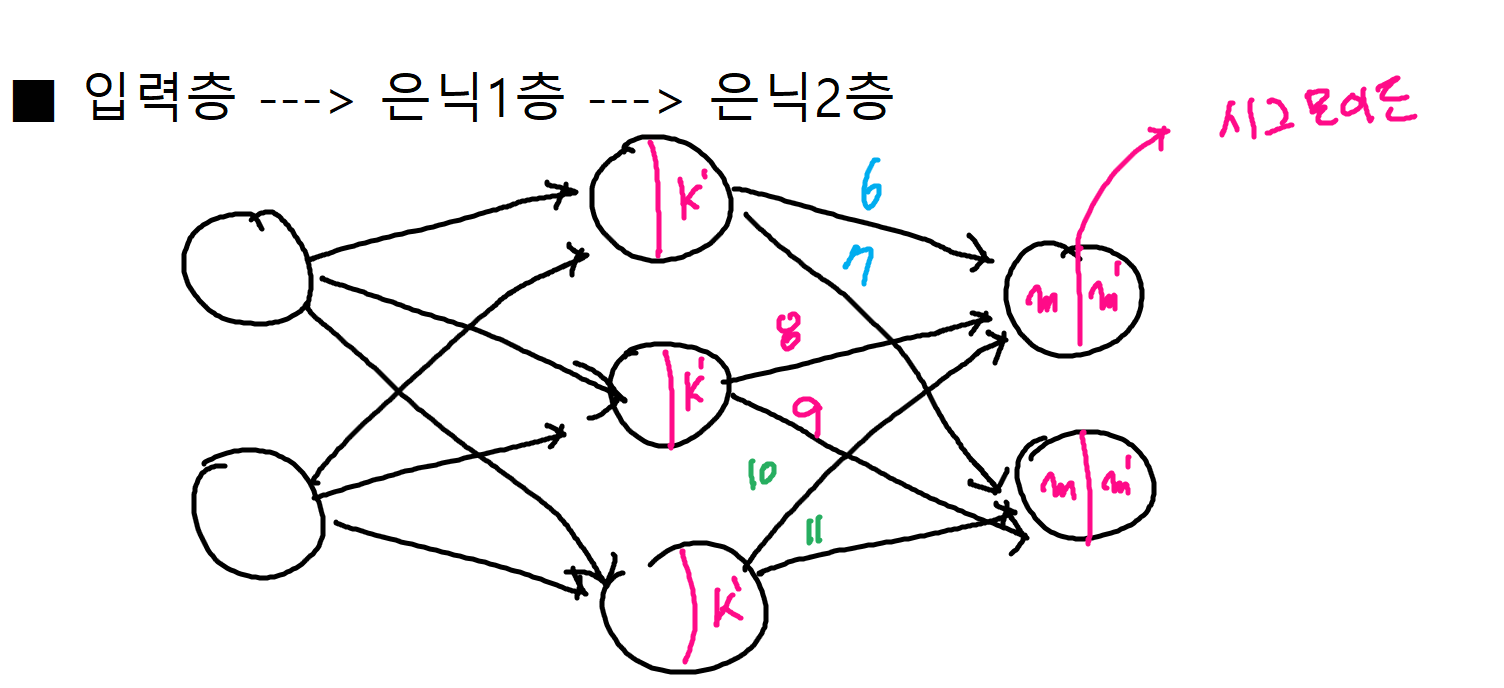

In [59]:
# 입력층(0층)  -> 은닉1층(1층) -> 은닉2층(2층)
# 그림보고 이해 잘해두기 !

import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

# 입력층 (0층)
x = np.array([1,2])

# 은닉1층 (1층)
w1 = np.array([[1,3,5],[2,4,6]])
k = np.dot(x,w1) # 가중치들의 곱의 합을 내적으로 표현함. (중요)

k_prime = sigmoid(k)


# 은닉2층 (2층)
w2 = np.array([[6,7],[8,9],[10,11]]) 
m = np.dot(k_prime,w2) # 가중치들의 곱의 합을 내적으로 표현함.

m_prime = sigmoid(m) # 시그모이드 적용

print(m_prime)

[1. 1.]


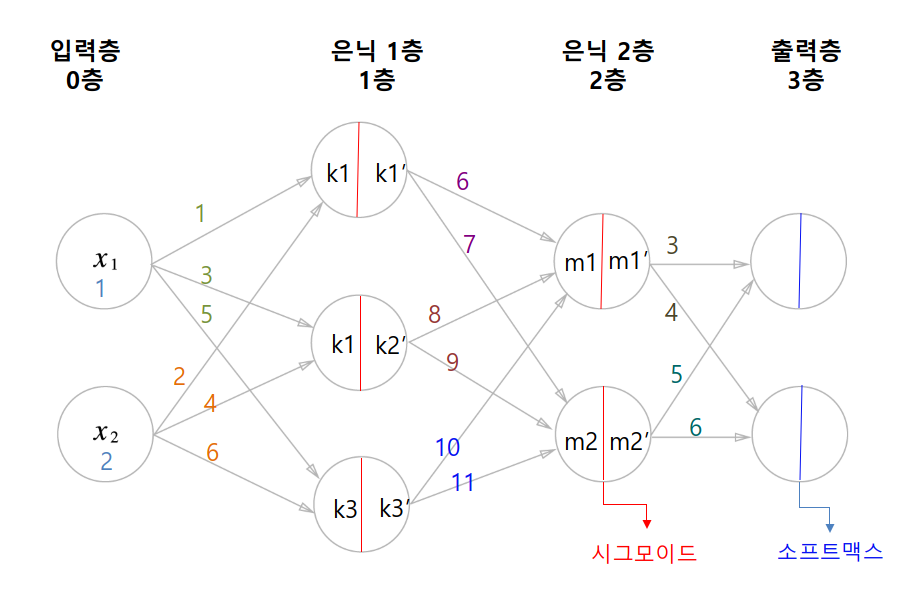

In [61]:
# 입력층(0층)  -> 은닉1층(1층) -> 은닉2층(2층) -> 출력층(3층)
# 그림보고 이해 잘해두기 !

import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

# 입력층 (0층)
x = np.array([1,2])

# 은닉1층 (1층)
w1 = np.array([[1,3,5],[2,4,6]])
k = np.dot(x,w1) # 가중치들의 곱의 합을 내적으로 표현함. (중요)

k_prime = sigmoid(k)


# 은닉2층 (2층)
w2 = np.array([[6,7],[8,9],[10,11]]) 
m = np.dot(k_prime,w2) # 가중치들의 곱의 합을 내적으로 표현함.

m_prime = sigmoid(m) # 시그모이드 적용

# 출력층 (3층) 
# softmax 함수 적용 예정 (sigmoid 아님)

w3 = np.array([[3,4],[5,6]])
o = np.dot(m_prime,w3)
print(o)

[ 8. 10.]


## ■ 5. 출력층 설계하기

### " 출력층의 함수는 그동안 흘러왔던 확률들의 숫자를 취합해서 결론을 내줘야하는 함수 "

신경망으로 구현하고자 하는 문제가 

1. 회귀 : 항등함수 -> 입력값을 받아서 그대로 출력하는 함수
2. 분류 : Softmax 함수 -> 입력값을 받아서 확률 벡터를 출력하는 함수 (식 3.10 참고)

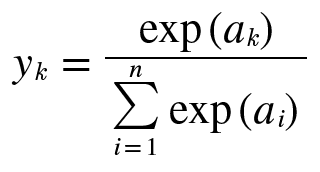

## ■ 소프트 맥스 함수 수학식을 컴퓨터 코드로 구현할 때 주의사항!

식 3.10 수학식을 파이썬으로 그대로 만들면 에러가 나서 구현이 안된다.    
왜냐하면 지수함수는 쉽게 아주 큰 값을 출력하게 때문에 컴퓨터는 큰 값이 출력이 되면 overflow가 출력되며 에러가 난다.  
__식 3.10__ 수학식을 __식 3.11__로 다시 전개해주어야 한다.    

소프트 맥스 함수는 지수함수를 사용하는데 이 지수함수라는 것이 쉽게 아주 큰 값을 출력한다.  

e( 스위스의 수학자 오일러가 발견한 무리수 ) 의 10승은 20,000이 넘고 e의 100승은 숫자가 40개가 넘고   
e의 1000승은 무한대를 뜻하는 inf가 출력되어 돌아오므로 컴퓨터로 계산할 수가 없다.

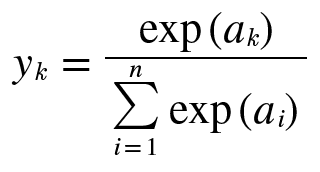

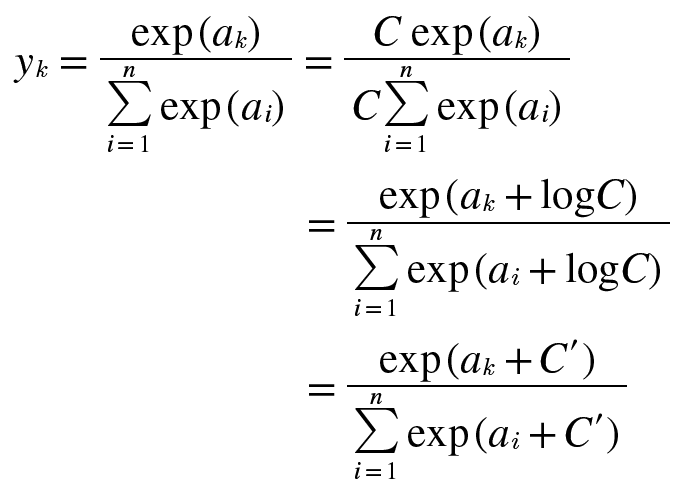

In [63]:
# 예

import numpy as np

print(np.exp(1))
print(np.exp(800))

2.718281828459045
inf


### ■ 해결하는 코드

In [64]:
import numpy as np
a = np.array([1010, 1000, 990])
print(np.exp(a)) # [inf inf inf] 

[inf inf inf]


이를 해결하기 위해서,  
__입력신호중에 최대값__을 이용해서 입력신호들을 입력신호중의 최대값으로 각각 빼준다.

In [67]:
import numpy as np
a = np.array([1010, 1000, 990])
C = np.max(a)

print(a - C) # [ 0 -10 20]
minus = a - C

print(np.exp(minus))

[  0 -10 -20]
[1.00000000e+00 4.53999298e-05 2.06115362e-09]


## ■ 위의 식을 이용해서 소프트 맥스 함수 구현하기 (식 3.11)

In [68]:
import numpy as np

a = np.array([1010, 1000, 990])

def softmax(a):
    C = np.max(a)
    minus = a - C # + C_prime을 (-C)로 처리
    exp_a = np.exp(minus) # 마지막식 분자
    sum_exp_a = np.sum(exp_a) # 마지막식 분모
    y = exp_a / sum_exp_a # numpy broadcast 기능으로 계산이 가능
    
    return y

print(softmax(a))

[1.00000000e+00 4.53999298e-05 2.06115362e-09]


## 확률로 표시할 수 있도록 분모식을 구현하면?

In [70]:
import numpy as np

a = np.array([1010, 1000, 990])

def softmax(a):
    C = np.max(a)
    minus = a - C # + C_prime을 (-C)로 처리
    exp_a = np.exp(minus) # 마지막식 분자
    sum_exp_a = np.sum(exp_a) # 마지막식 분모
    y = exp_a / sum_exp_a # numpy broadcast 기능으로 계산이 가능
    
    return y

print(softmax(a)) # 결과값은 확률로 나타남

print(np.sum(softmax(a))) # 요소들의 총합은 무조건 1이 된다.

[9.99954600e-01 4.53978686e-05 2.06106005e-09]
1.0


## 문제34. 방금 softmax 함수를 통과한 결과인 확률벡터에서 가장 큰 값만 1로 출력하고 나머지는 0으로 출력되게 하시오!

In [7]:
import numpy as np

a = np.array([1010, 1000, 990])

def softmax(a):
    C = np.max(a)
    minus = a - C # + C_prime을 (-C)로 처리
    exp_a = np.exp(minus) # 마지막식 분자
    sum_exp_a = np.sum(exp_a) # 마지막식 분모
    y = exp_a / sum_exp_a # numpy broadcast 기능으로 계산이 가능
    
    return y

print(softmax(a)) # 결과값은 확률로 나타남
print(np.sum(softmax(a))) # 요소들의 총합은 무조건 1이 된다.

x = softmax(a)
x2 = (x==max(x)) # [True, False, False]
x2 = x2.astype(np.int)
print(x2)

[9.99954600e-01 4.53978686e-05 2.06106005e-09]
1.0
[1 0 0]


## 문제35. 3층 신경망에 출력층을 소프트맥스 함수로 구현하여 확률벡터가 출력되게 완성 시키시오!

In [76]:
# 입력층(0층)  -> 은닉1층(1층) -> 은닉2층(2층) -> 출력층(3층)
# 그림보고 이해 잘해두기 !
# 최종 완성본!

import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

def softmax(a):
    C = np.max(a)
    minus = a - C # + C_prime을 (-C)로 처리
    exp_a = np.exp(minus) # 마지막식 분자
    sum_exp_a = np.sum(exp_a) # 마지막식 분모
    y = exp_a / sum_exp_a # numpy broadcast 기능으로 계산이 가능
    
    return y

# 입력층 (0층)
x = np.array([1,2])

# 은닉1층 (1층)
w1 = np.array([[1,3,5],[2,4,6]])
k = np.dot(x,w1) # 가중치들의 곱의 합을 내적으로 표현함. (중요)

k_prime = sigmoid(k)


# 은닉2층 (2층)
w2 = np.array([[6,7],[8,9],[10,11]]) 
m = np.dot(k_prime,w2) # 가중치들의 곱의 합을 내적으로 표현함.

m_prime = sigmoid(m) # 시그모이드 적용

# 출력층 (3층) 
# softmax 함수 적용 예정 (sigmoid 아님)

w3 = np.array([[3,4],[5,6]])
o = np.dot(m_prime,w3)

o_prime = softmax(o)

print(o_prime)
print(np.sum(o_prime))

[0.11920292 0.88079708]
1.0
